In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.manual_seed(4242)

In [12]:
dataset = torch.tensor([[0.,8.],[1.,8.],[2.,8.],[3.,8.],[4.,8.],
                        [0.,7.],[1.,7.],[2.,7.],[3.,7.],[4.,7.],
                        [0.,6.],[1.,6.],[2.,6.],[3.,6.],[4.,6.],
                        [0.,5.],[1.,5.],[2.,5.],[3.,5.],[4.,5.],
                        [0.,4.],[1.,4.],[2.,4.],[3.,4.],[4.,4.],
                        [0.,3.],[1.,3.],[2.,3.],[3.,3.],[4.,3.],
                        [0.,2.],[1.,2.],[2.,2.],[3.,2.],[4.,2.],
                        [0.,1.],[1.,1.],[2.,1.],[3.,1.],[4.,1.]])

labels = torch.tensor(  [0.,0.,0.,0.,0.,
                         0.,0.,0.,0.,0.,
                         0.,0.,0.,0.,0.,
                         0.,0.,1.,0.,0.,
                         1.,1.,1.,0.,1.,
                         1.,1.,0.,1.,1.,
                         1.,1.,1.,1.,1.,
                         1.,1.,1.,1.,1.])

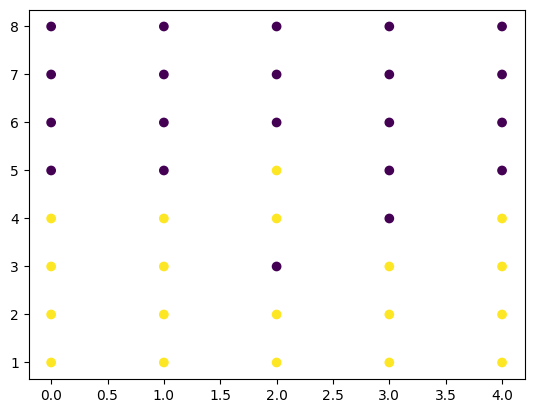

In [13]:
plt.scatter([p[0] for p in dataset],[p[1] for p in dataset], c=labels,cmap = 'viridis')
plt.show()

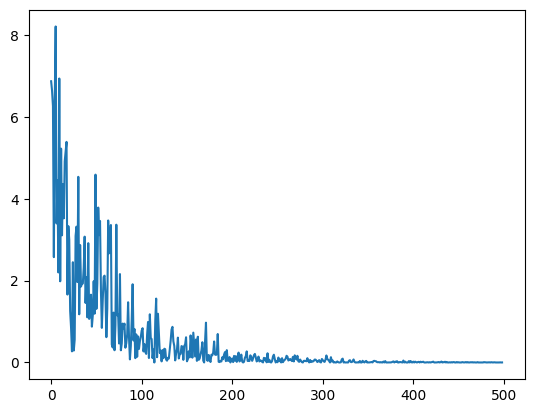

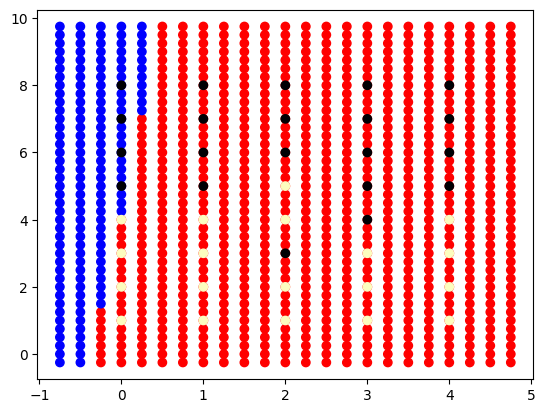

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        self.act = torch.nn.ReLU() # usare i logits 
    
    def forward(self, x):
        x = self.linear(x)
        x = self.act(x)
        return x

class L1(nn.Module):
    def __init__(self):
        super(L1, self).__init__()

    def forward(self, predictions, targets):
        # Mi interessa solo non far passare chi non deve passare
        loss = torch.mean(
                ((
                    (1 - targets)*(predictions - targets)
                ) ** 2)
            )
        return loss

train_data = []
for i in range(len(dataset)):
   train_data.append([dataset[i], labels[i]])
   
dl = torch.utils.data.DataLoader(train_data, batch_size = 8, shuffle = True)

e_list = []

modello = Model(2,1)
loss = L1()
optimizer = torch.optim.Adam(modello.parameters())

epoch = range(1, 500)

for e in epoch:
    for x,y in dl:
        y_pred = modello(x)
        error = loss(y_pred, y)

        optimizer.zero_grad()
        error.backward()
        optimizer.step()
        
        if(error.detach().numpy() == 0):
            # Alleno su L2 con matrice di proiezione Z(y==0)
            pass
        
    e_list.append(error.detach().numpy())

plt.plot([x for x in range(len(e_list))], e_list)
plt.show()
points = [[x/4, y/4, modello(torch.tensor([x/4*1.0,y/4*1.0]))] for x in range(-3,5*4) for y in range(-1,10*4)]
plt.scatter([p[0] for p in points], [p[1] for p in points], c=["r" if p[2] == 0 else "b" for p in points])
plt.scatter([p[0] for p in dataset],[p[1] for p in dataset], c=labels,cmap = 'magma')

In [15]:
# Rosso -> Non entrano
# Blu -> Entrano

# Giallo -> Possono entrare
# Viola -> Non possono entrare